# MLP CW 2 - PART B

## Setup

In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


def train_model_and_plot_stats(model,
                               error,
                               learning_rule,
                               train_data,
                               valid_data,
                               test_data,
                               num_epochs,
                               stats_interval,
                               notebook=False,
                               earlyStopping=True):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors = {'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    if earlyStopping:
        optimiser = EarlyStoppingOptimiser(
            model,
            error,
            learning_rule,
            train_data,
            valid_data,
            test_data,
            data_monitors,
            notebook=notebook,
            steps=3,
            patience=3)
        stats, key, run_time, best_epoch = optimiser.train(
            max_num_epochs=num_epochs, stats_interval=stats_interval)
        return (stats, key, run_time, best_epoch)
    else:
        optimiser = Optimiser(
            model,
            error,
            learning_rule,
            train_data,
            valid_data,
            test_data,
            data_monitors,
            notebook=notebook)

        stats, keys, run_time = optimiser.train(
            num_epochs=num_epochs, stats_interval=stats_interval)
        return (stats, key, run_time)

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']
['inputs', 'targets']


In [6]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import *
from mlp.errors import CrossEntropyLogSoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule, AdamLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser, EarlyStoppingOptimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

Epoch 1: 180.5s to complete
    error(train)=3.85e+00, acc(train)=1.65e-02, error(valid)=3.85e+00, acc(valid)=1.78e-02, error(test)=3.85e+00, acc(test)=1.69e-02
Epoch 2: 180.8s to complete
    error(train)=7.89e-01, acc(train)=7.54e-01, error(valid)=8.13e-01, acc(valid)=7.44e-01, error(test)=8.38e-01, acc(test)=7.41e-01
Epoch 3: 180.9s to complete
    error(train)=6.11e-01, acc(train)=8.06e-01, error(valid)=6.42e-01, acc(valid)=7.97e-01, error(test)=6.72e-01, acc(test)=7.88e-01
Epoch 4: 180.7s to complete
    error(train)=5.15e-01, acc(train)=8.30e-01, error(valid)=5.57e-01, acc(valid)=8.18e-01, error(test)=5.90e-01, acc(test)=8.08e-01
Epoch 5: 181.0s to complete
    error(train)=4.72e-01, acc(train)=8.43e-01, error(valid)=5.23e-01, acc(valid)=8.28e-01, error(test)=5.55e-01, acc(test)=8.21e-01
Epoch 6: 185.4s to complete
    error(train)=4.40e-01, acc(train)=8.52e-01, error(valid)=5.05e-01, acc(valid)=8.32e-01, error(test)=5.37e-01, acc(test)=8.24e-01
Epoch 7: 183.6s to complete
    er

UnboundLocalError: local variable 'keys' referenced before assignment

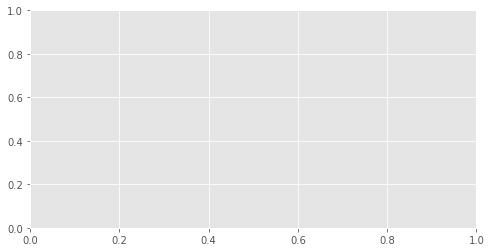

In [7]:
train_data.reset()
valid_data.reset()
test_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer((12 * 12 * 5, )),
    AffineLayer(12 * 12 * 5, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropyLogSoftmaxError()
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
trial1 = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False,
    earlyStopping=True)

In [1]:
import pickle as pkl

In [ ]:
pkl.dump(trial1, open('trial1.pkl'), protocol=-1)

In [1]:
from __future__ import print_function
import pickle as pkl
import numpy as np
import logging
from mlp.helper import train_model_and_plot_stats
from mlp.data_providers import EMNISTDataProvider

# Seed a random number generator
seed = 10102016
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import *
from mlp.errors import CrossEntropyLogSoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule, AdamLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser, EarlyStoppingOptimiser
from mlp.penalty import *

# setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

trial=1
train_data.reset()
valid_data.reset()
test_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer_NUMBA(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer_NUMBA(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer(output_shape=(12 * 12 * 5,)),
    ReluLayer(),
    ReshapeLayer(output_shape=(5,12,12)),
    ConvolutionalLayer_NUMBA(
        num_input_channels=5,
        num_output_channels=10,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer_NUMBA(
        num_input_channels=10, input_dim_1=8, input_dim_2=8, extent=2),
    ReshapeLayer(output_shape=(4 * 4 * 10,)),
    AffineLayer(4*4*10, 400, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(400, 400, weights_init, biases_init), # 4 hidden layers with 400 each!
    ReluLayer(),
    AffineLayer(400, 400, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(400, 400, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(400, output_dim, weights_init, biases_init)
])

error = CrossEntropyLogSoftmaxError()
learning_rule = AdamLearningRule()

# Remember to use notebook=False when you write a script to be run in a terminal
output = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=True,
    displayGraphs=False)
pkl.dump(output, open('BASELINE_2layer_4DNN.{}.pkl'.format(trial), 'wb'), protocol=-1)


['inputs', 'targets']
['inputs', 'targets']
['inputs', 'targets']


Epoch 1: 2899.7s to complete
    error(train)=5.77e-01, acc(train)=8.08e-01, error(valid)=5.95e-01, acc(valid)=8.03e-01, error(test)=6.35e-01, acc(test)=7.92e-01


KeyboardInterrupt: 